In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, KFold
from xgboost import XGBRegressor
from sklearn.svm import SVR

PCA

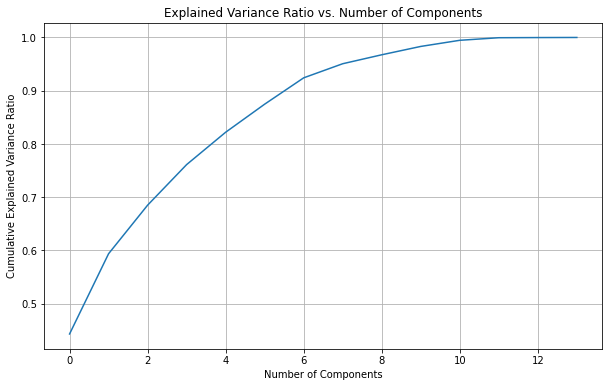

Number of components needed to explain 95% of the variance: 8


In [2]:
#running a PCA on the processed dataset and testing different machine learning models to see which one is the most accurate one.
# Prepare the variables
df = pd.read_csv('raw_data/cleaned_boston_data.csv')

# # Data Preprocessing
X = df.drop(columns=['MEDV'])
y = df['MEDV']
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.show()

# Print the number of components needed to explain 95% of the variance
n_components_95 = np.argmax(np.cumsum(explained_variance_ratio) >= 0.95) + 1
print(f"Number of components needed to explain 95% of the variance: {n_components_95}")

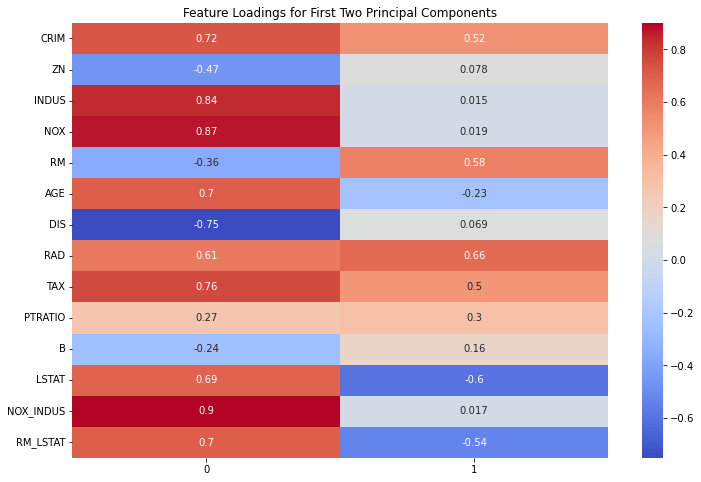

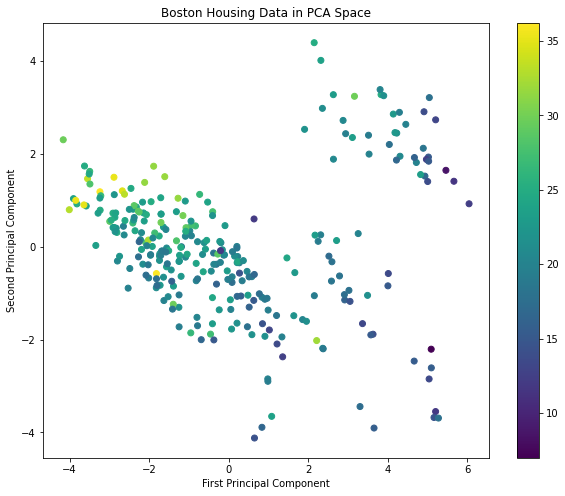

In [3]:
# Get the feature loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Plot the feature loadings for the first two principal components
plt.figure(figsize=(12, 8))
sns.heatmap(loadings[:, :2], annot=True, cmap='coolwarm', yticklabels=X.columns)
plt.title('Feature Loadings for First Two Principal Components')
plt.show()

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Boston Housing Data in PCA Space')
plt.show()

Machine Learning models

Mean Squared Error: 7.381785071749032
R-squared: 0.7350205650452857


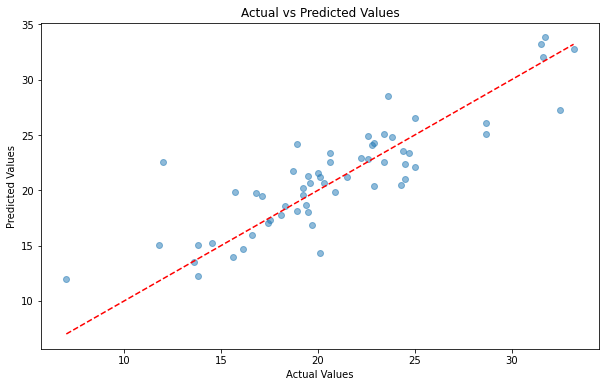

In [4]:
#Training the models on the Principal component features
X_train,X_test,y_train,y_test = train_test_split(X_pca,y,test_size=0.20, random_state = 42)

#linear regression
lmodel = LinearRegression()
lmodel.fit(X_train,y_train)

# Make predictions on the test set
predictions = lmodel.predict(X_test)

# Calculate MSE and R-squared
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

# Plot Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)  # Scatter plot of actual vs predicted values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # Red dashed line for perfect predictions
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

Mean Squared Error: 10.999830508474576
R-squared: 0.6051457954406945


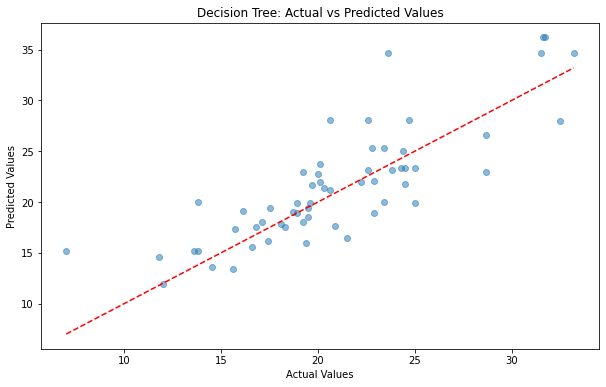

In [5]:
#Decision Tree
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train,y_train)

pred_tree = tree_model.predict(X_test)

#evaluate model performance
mse_tree = mean_squared_error(y_test,pred_tree)
r2_tree = r2_score(y_test,pred_tree)

print(f"Mean Squared Error: {mse_tree}")
print(f"R-squared: {r2_tree}")

# Plot Actual vs Predicted Values for Decision Tree Model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred_tree, alpha=0.5)  # Scatter plot of actual vs predicted values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # Red dashed line for perfect predictions
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.show()

Random Forest MSE: 6.90880347457627
Random Forest R-squared: 0.7519988968640312


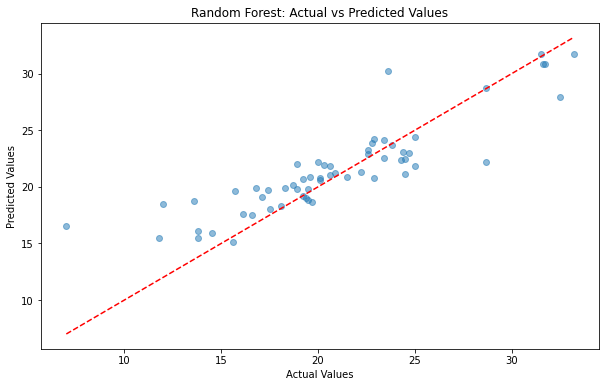

In [6]:
#random forest regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train,y_train)

pred_rf = rf_model.predict(X_test)

# Calculate MSE and R-squared for evaluation
mse_rf = mean_squared_error(y_test, pred_rf)
r2_rf = r2_score(y_test, pred_rf)

print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R-squared: {r2_rf}")

# Plot Actual vs Predicted Values for Random Forest Model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred_rf, alpha=0.5)  # Scatter plot of actual vs predicted values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # Red dashed line for perfect predictions
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest: Actual vs Predicted Values')
plt.show()

Gradient Boosting MSE: 6.667193117935751
Gradient Boosting R-squared: 0.7606718364253346


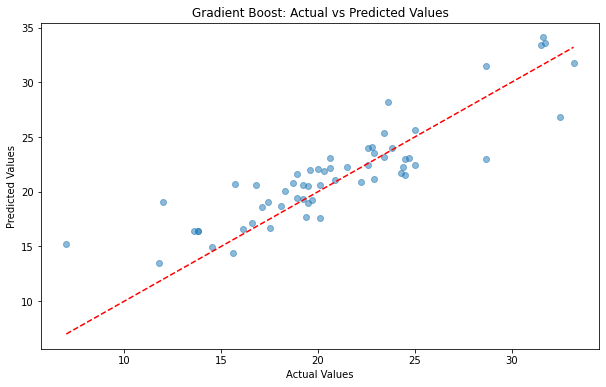

In [7]:
#Gradient Boosting
gbr_model = GradientBoostingRegressor(learning_rate=0.1)

gbr_model.fit(X_train,y_train)
pred_gbr = gbr_model.predict(X_test)

mse_gbr = mean_squared_error(y_test, pred_gbr)
r2_gbr = r2_score(y_test, pred_gbr)

print(f"Gradient Boosting MSE: {mse_gbr}")
print(f"Gradient Boosting R-squared: {r2_gbr}")

# Plot Actual vs Predicted Values for Gradient Boost Regressor model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred_gbr, alpha=0.5)  # Scatter plot of actual vs predicted values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # Red dashed line for perfect predictions
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Gradient Boost: Actual vs Predicted Values')
plt.show()

In [8]:
import sys
!{sys.executable} -m pip install xgboost

In [9]:
# Create and train the XGBRegressor model
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    max_depth=3,
    learning_rate=0.1,
    n_estimators=100
)

# Fit the model
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the model
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

print(f"Mean Squared Error: {xgb_mse}")
print(f"R-squared Score: {xgb_r2}")

Mean Squared Error: 6.7073577340175214
R-squared Score: 0.7592300717070348


In [10]:
#SVM
# Using the RBF kernel
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train & testing the model
svr.fit(X_train, y_train)

pred_svr = svr.predict(X_test)

#model performance
svr_mse = mean_squared_error(y_test, pred_svr)
svr_r2 = r2_score(y_test, pred_svr)

print(f"SVR Mean Squared Error: {svr_mse}")
print(f"SVR R-squared Score: {svr_r2}")

SVR Mean Squared Error: 11.467218755169029
SVR R-squared Score: 0.5883682447114607


In [11]:
#Model Evaluation using k fold cross validation
def cross_validate(models, X, y, n_splits=5):
    results = []
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    X = np.array(X)
    y = np.array(y)
    
    for model_name, model in models.items():
        mse_scores = []
        r2_scores = []
        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            model.fit(X_train, y_train)
            predictions = model.predict(X_test)
            mse_scores.append(mean_squared_error(y_test, predictions))
            r2_scores.append(r2_score(y_test, predictions))
        results.append({
            'model_name': model_name,
            'MSE': np.mean(mse_scores),
            'R^2': np.mean(r2_scores)
        })
    return pd.DataFrame(results)

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regressor': SVR(),
    'XGBoost': XGBRegressor(objective='reg:squarederror', max_depth=3, learning_rate=0.1, n_estimators=100)
}

evaluation = cross_validate(models, X_pca,y, n_splits = 5)
print(evaluation)

                 model_name        MSE       R^2
0         Linear Regression   7.811382  0.627191
1             Decision Tree  15.070022  0.247793
2             Random Forest   8.304221  0.607138
3         Gradient Boosting   7.487019  0.634448
4  Support Vector Regressor   9.993228  0.571363
5                   XGBoost   7.322185  0.652139


In [12]:
#using random forest for our price predictions as it is our best model
def predict_price(features):
    """
    Predict the house price based on input features using the trained Random Forest model.
    
    Returns:
    float: Predicted house price in $1000s
    """
    # Ensure the input is a 2D array
    features_array = np.array(features).reshape(1, -1)
    
    # Make prediction
    price_prediction = rf_model.predict(features_array)
    
    return price_prediction[0]

# new_house_features = []
# predicted_price = predict_price(new_house_features)
# print(f"Predicted house price: ${predicted_price:.2f}k")